In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from funtion_v2 import *

%matplotlib inline

In [2]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 0. It's a non-cat picture.


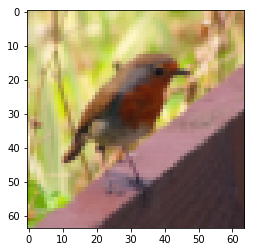

In [3]:
# Example of a picture
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [4]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [10]:
def initialize_parameters(num_prevlay):

    
    np.random.seed(1)
    
    ### START CODE HERE ### (≈ 4 lines of code)
  
    W1 = np.random.randn(3, 3, 3, 8)* 0.0001  #(f, f, n_C_prev)
    b1 = np.random.randn(1, 1, 1, 8)* 0.0001
    W2 = np.random.randn(1, num_prevlay)* 0.0001 
    b2 = np.zeros((1, 1))
    ### END CODE HERE ###
    
    assert(W1.shape == (3, 3, 3, 8))
    assert(b1.shape == (1, 1, 1, 8))
    assert(W2.shape == (1, num_prevlay))
    assert(b2.shape == ((1, 1)))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters    

In [11]:
def model(X, Y, learning_rate, num_iterations, print_cost=False):
    """
    Implements a one-layer neural network: CONV -> RELU -> MAXPOOL -> SIGMOID
    
    Arguments:
    X -- input data, of shape (number of examples, n_H, n_W, 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """

    grads = {}
    costs = []                              # to keep track of the cost
    m = ((X.shape[1]-8)/8+1)*((X.shape[1]-8)/8+1)*8                           # number of examples
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
  
    parameters = initialize_parameters(m)
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
        

        # Forward propagation: CONV -> RELU -> MAXPOOL -> SIGMOID. 
        
        # CONV
        Z1, cache_conv1 = conv_forward(X, W1, b1, hparameters={"pad" : 1, "stride" : 1})
        ######
        
        #RELU
        A1, cache_relu1 = relu(Z1)
        cache_relu1= cache_relu1.reshape(A1.shape[0], -1).T
        ######
        
        #MAXPOOL
        P1, cache_maxpool = pool_forward(A1, hparameters={"stride" : 8 , "f" : 8 })
        ######
        
        #Flatten P1
        P1_flat = P1.reshape(P1.shape[0], -1).T
        
        #SIGMOID
        A2, cache_sigmoid2 = linear_activation_forward(P1_flat, W2, b2, activation="sigmoid")
        ######
        
        # Compute cost

        cost = compute_cost(A2, Y)

        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation.
        
        #SIGMOID
        dP1_flat, dW2, db2 = linear_activation_backward(dA2, cache_sigmoid2, activation="sigmoid")
        ########
        
        dP1 =  dP1_flat.reshape(P1.shape[0], P1.shape[1], P1.shape[2], P1.shape[3])
        
        #MAXPOOL
        dA1 = pool_backward(dP1, cache_maxpool, mode = "max")
        #######
        
        
        dA1_flat = dA1.reshape(dA1.shape[0], -1).T
        
        
        #RELU
        dZ1_flat = relu_backward(dA1_flat, cache_relu1)
        #######
        
        dZ1 = dZ1_flat.reshape(Z1.shape[0], Z1.shape[1], Z1.shape[2], Z1.shape[3])
        
        
        #CONV
        dA0, dW1, db1 = conv_backward(dZ1, cache_conv1)
        #######
    
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.

        parameters = update_parameters(parameters, grads, learning_rate)


        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 1 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 1 == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [7]:
X = np.random.randn(5,64,64,3)
Y = np.random.randint(2, size=(1,5))
#Y = np.array(([1],[0], [0], [1], [1], [0])).T
#parameters = model(X, Y, learning_rate = 0.000001, num_iterations = 5, print_cost=True)

parameters = model(train_x_orig, train_y, learning_rate = 0.000001, num_iterations = 5, print_cost=True)

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Cost after iteration 0: 32.8913502253439
Cost after iteration 1: 32.914422899431244
Cost after iteration 2: 32.93742088868891


KeyboardInterrupt: 

In [32]:
X = np.random.randn(10,64,64,3)
Y = np.random.randint(2, size=(1,10))
grads = {}
costs = []                              # to keep track of the cost
m = ((X.shape[1]-8)/8+1)*((X.shape[1]-8)/8+1)*8                           # number of examples
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
parameters = initialize_parameters(m)
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
W1 = parameters["W1"]
b1 = parameters["b1"]
W2 = parameters["W2"]
b2 = parameters["b2"]
learning_rate=0.000001

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [34]:
Z1, cache_conv1 = conv_forward(X, W1, b1, hparameters={"pad" : 1, "stride" : 1})
        ######
        
        #RELU
A1, cache_relu1 = relu(Z1)
cache_relu1= cache_relu1.reshape(A1.shape[0], -1).T
        ######
        
        #MAXPOOL
P1, cache_maxpool = pool_forward(A1, hparameters={"stride" : 8 , "f" : 8 })
        ######
        
        #Flatten P1
P1_flat = P1.reshape(P1.shape[0], -1).T
        
        #SIGMOID
A2, cache_sigmoid2 = linear_activation_forward(P1_flat, W2, b2, activation="sigmoid")
        ######
        
        # Compute cost

cost = compute_cost(A2, Y)

        
        # Initializing backward propagation
dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation.
        
        #SIGMOID
dP1_flat, dW2, db2 = linear_activation_backward(dA2, cache_sigmoid2, activation="sigmoid")
        ########
        
dP1 =  dP1_flat.reshape(P1.shape[0], P1.shape[1], P1.shape[2], P1.shape[3])
        
        #MAXPOOL
dA1 = pool_backward(dP1, cache_maxpool, mode = "max")
        #######
        
        
dA1_flat = dA1.reshape(dA1.shape[0], -1).T
        
        
        #RELU
dZ1_flat = relu_backward(dA1_flat, cache_relu1)
        #######
        
dZ1 = dZ1_flat.reshape(Z1.shape[0], Z1.shape[1], Z1.shape[2], Z1.shape[3])
        
        
        #CONV
dA0, dW1, db1 = conv_backward(dZ1, cache_conv1)
        #######
    
        
        
        ### END CODE HERE ###
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
grads['dW1'] = dW1
grads['db1'] = db1
grads['dW2'] = dW2
grads['db2'] = db2
        
        # Update parameters.
        ### START CODE HERE ### (approx. 1 line of code)
parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###

        # Retrieve W1, b1, W2, b2 from parameters
W1 = parameters["W1"]
b1 = parameters["b1"]
W2 = parameters["W2"]
b2 = parameters["b2"]
        

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Cost after iteration 0: 1.1090354983729949
Cost after iteration 1: 1.1090354983716837
Cost after iteration 2: 1.109035498370409
Cost after iteration 3: 1.1090354983691697
Cost after iteration 4: 1.1090354983679667
Cost after iteration 5: 1.1090354983667998
Cost after iteration 6: 1.1090354983656692
Cost after iteration 7: 1.1090354983645747
Cost after iteration 8: 1.109035498363516
Cost after iteration 9: 1.1090354983624933


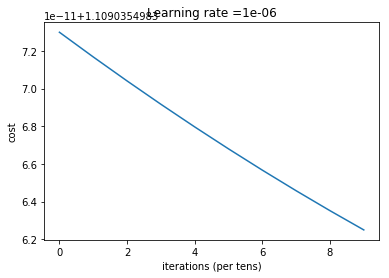

In [13]:
X = np.random.randn(5,64,64,3)
Y = np.random.randint(2, size=(1,5))
parameters = model(X, Y, learning_rate = 0.000001, num_iterations = 10, print_cost=True)